In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.quadratic_double_banana_pullback_manifold import QuadraticDoubleBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


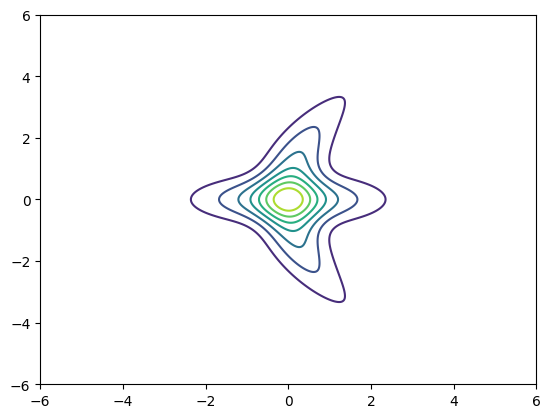

In [2]:
double_banana_manifold = QuadraticDoubleBananaPullbackManifold()

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])
x2 = torch.tensor([2.,0.])

p = 10

In [4]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[8.1250, 0.0000],
         [0.0000, 8.0312]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])
tensor([[[ 0.2643,  0.0000],
         [ 0.0000, 15.9855]]])


Epoch 0, Loss 108.27095794677734
Epoch 100, Loss 63.65703582763672
Epoch 200, Loss 56.622802734375
Epoch 300, Loss 52.683956146240234
Epoch 400, Loss 52.207176208496094
Epoch 500, Loss 52.20716857910156
Epoch 600, Loss 52.20717239379883
Epoch 700, Loss 52.20716857910156
Epoch 800, Loss 52.20718765258789
Epoch 900, Loss 52.20717239379883
Epoch 1000, Loss 52.20726013183594
Epoch 1100, Loss 52.20717239379883
Epoch 1200, Loss 52.20716857910156
Epoch 1300, Loss 52.20716857910156
Epoch 1400, Loss 52.20716857910156
Epoch 1500, Loss 52.207454681396484
Epoch 1600, Loss 52.22050476074219
Epoch 1700, Loss 52.2073974609375
Epoch 1800, Loss 52.20717239379883
Epoch 1900, Loss 52.207210540771484
Epoch 0, Loss 120.546630859375
Epoch 100, Loss 37.524269104003906
Epoch 200, Loss 33.18714904785156
Epoch 300, Loss 31.033010482788086
Epoch 400, Loss 29.095182418823242
Epoch 500, Loss 27.279956817626953
Epoch 600, Loss 26.68828582763672
Epoch 700, Loss 26.624183654785156
Epoch 800, Loss 26.622913360595703
E

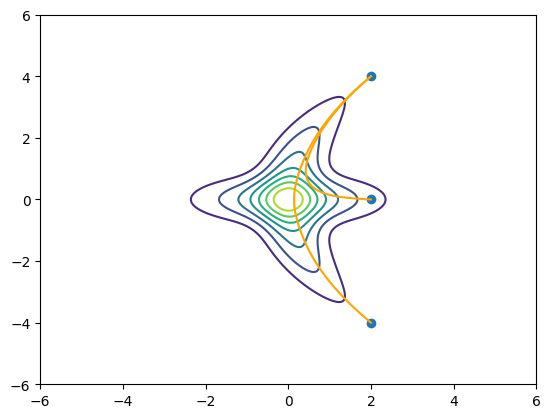

In [6]:
# test interpolation
t = torch.linspace(0.,1.,100)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t,p=p).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t,p=p).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

In [7]:
# debug Christoffel operator
from src.curves.harmonic_curves.boundary_harmonic_curve import BoundaryHarmonicCurve
# TODO compute geodesics and check what Christoffel loss at the geodesics is
gamma = BoundaryHarmonicCurve(2, p, x0, x1)
gamma.fit(double_banana_manifold.manifold.geodesic_loss_function)
geo = gamma.forward(t).detach()
dot_geo = gamma.differential_forward(t).detach()

Epoch 0, Loss 108.27095794677734
Epoch 100, Loss 63.65703582763672
Epoch 200, Loss 56.622802734375
Epoch 300, Loss 52.683956146240234
Epoch 400, Loss 52.207176208496094
Epoch 500, Loss 52.20716857910156
Epoch 600, Loss 52.20717239379883
Epoch 700, Loss 52.20716857910156
Epoch 800, Loss 52.20718765258789
Epoch 900, Loss 52.20717239379883
Epoch 1000, Loss 52.20726013183594
Epoch 1100, Loss 52.20717239379883
Epoch 1200, Loss 52.20716857910156
Epoch 1300, Loss 52.20716857910156
Epoch 1400, Loss 52.20716857910156
Epoch 1500, Loss 52.207454681396484
Epoch 1600, Loss 52.22050476074219
Epoch 1700, Loss 52.2073974609375
Epoch 1800, Loss 52.20717239379883
Epoch 1900, Loss 52.207210540771484
Epoch 0, Loss 120.546630859375
Epoch 100, Loss 37.524269104003906
Epoch 200, Loss 33.18714904785156
Epoch 300, Loss 31.033010482788086
Epoch 400, Loss 29.095182418823242
Epoch 500, Loss 27.279956817626953
Epoch 600, Loss 26.68828582763672
Epoch 700, Loss 26.624183654785156
Epoch 800, Loss 26.622913360595703
E

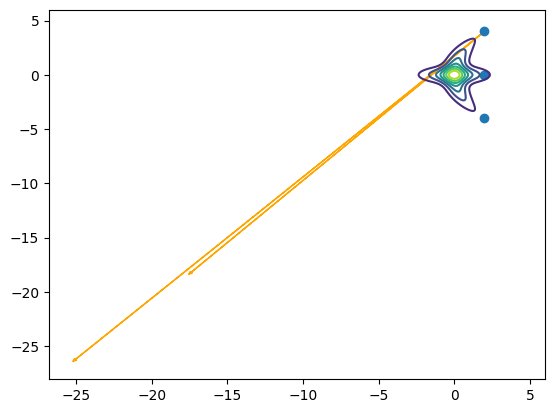

In [8]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/logarithmic.eps")
plt.show()

# ps = [10,20,30,40,50,60,70,80,90,100]
# error_to_ref = torch.zeros(len(ps), 2)
# for i, p in enumerate(ps):
#     logarithmic_x0_x1_p = double_banana_manifold.log(x0,x1[None], p=p)[0].detach().numpy()
#     logarithmic_x0_x2_p = double_banana_manifold.log(x0,x2[None], p=p)[0].detach().numpy()

#     error_to_ref[i,0] = torch.norm(torch.tensor(logarithmic_x0_x1_p) - torch.tensor(logarithmic_x0_x1))
#     error_to_ref[i,1] = torch.norm(torch.tensor(logarithmic_x0_x2_p) - torch.tensor(logarithmic_x0_x2))

#     plt.contour(x_grid, y_grid, density_banana)
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x1_p[0], logarithmic_x0_x1_p[1], head_width=0.2, color="orange")
#     plt.arrow(x0[0], x0[1], logarithmic_x0_x2_p[0], logarithmic_x0_x2_p[1], head_width=0.2, color="orange")
#     plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
#     plt.savefig(f"results/quadratic_double_banana/logarithmic_p{p}.eps")
#     plt.show()


# plt.plot(ps, error_to_ref)
# plt.savefig("results/quadratic_double_banana/logarithmic_stability.eps")
# plt.show()

Epoch 0, Loss 11649998.0
Epoch 100, Loss 38120.7421875
Epoch 200, Loss 35995.07421875
Epoch 300, Loss 34119.31640625
Epoch 400, Loss 32524.189453125
Epoch 500, Loss 31198.677734375
Epoch 600, Loss 30092.41796875
Epoch 700, Loss 29158.140625
Epoch 800, Loss 28360.41015625
Epoch 900, Loss 27673.953125
Epoch 1000, Loss 27080.265625
Epoch 1100, Loss 26564.947265625
Epoch 1200, Loss 26116.0703125
Epoch 1300, Loss 25723.39453125
Epoch 1400, Loss 25377.9609375
Epoch 1500, Loss 25071.84765625
Epoch 1600, Loss 24798.091796875
Epoch 1700, Loss 24550.546875
Epoch 1800, Loss 24323.7109375
Epoch 1900, Loss 24112.73046875
Epoch 0, Loss 1910592.375
Epoch 100, Loss 14650.29296875
Epoch 200, Loss 12026.7216796875
Epoch 300, Loss 10558.455078125
Epoch 400, Loss 9683.818359375
Epoch 500, Loss 9070.1591796875
Epoch 600, Loss 8616.775390625
Epoch 700, Loss 8271.4521484375
Epoch 800, Loss 8002.88427734375
Epoch 900, Loss 7790.33544921875
Epoch 1000, Loss 7619.4267578125
Epoch 1100, Loss 7479.89892578125
Epo

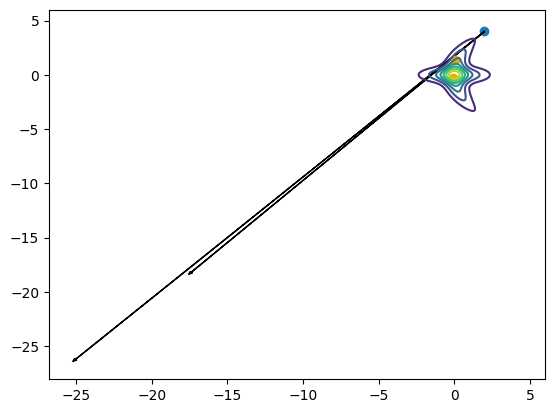

The error between exp_x0(log_x0 (x1)) and x1 is 4.2560200691223145
The error between exp_x0(log_x0 (x2)) and x2 is 2.334538459777832


In [9]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None], p=p)[0].detach().numpy()
exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None], p=p)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="orange")
plt.savefig("results/quadratic_double_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [10]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

NameError: name 'banana_manifold' is not defined

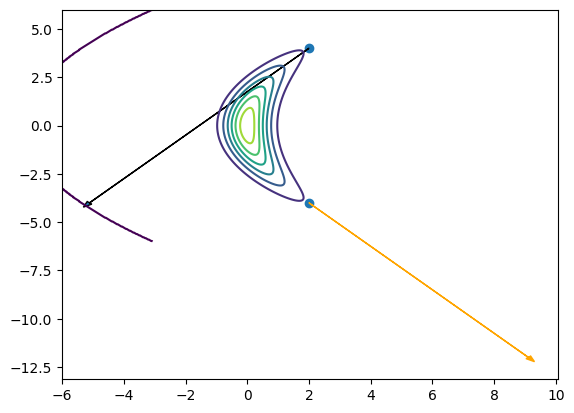

In [ ]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_double_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


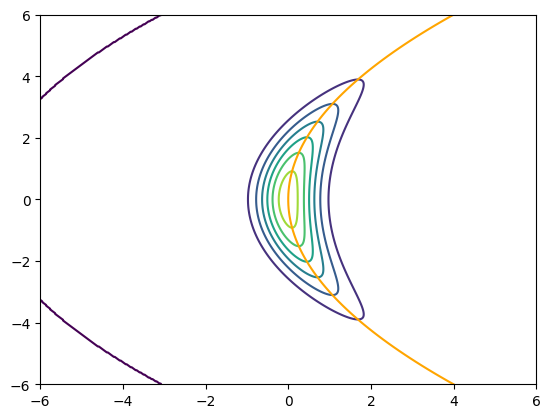

In [ ]:
# Riemannian autoencoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/quadratic_double_banana/rae_manifold.eps")
plt.show()